In [81]:
from misc import draw_small_world
from multiprocessing import Pool
import numpy as np
from graph import ScaleFree
from viz import draw_data
from utils import Timer, partition
from engine import fun
import jupyternotify
import random
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib notebook

<IPython.core.display.Javascript object>

In [141]:
n = 1000 # number of vertices
m = 5 # avg deg 
T = 1000
TAIL = T // 2
I = 10

In [142]:
alpha = .10
bs = partition(0, 10, 32)

In [108]:
bs = np.sort(np.concatenate((partition(.1, 10.1, 10), partition(-.1, 10 - .1, 10))))
bs

array([ 0.9,  1.1,  1.9,  2.1,  2.9,  3.1,  3.9,  4.1,  4.9,  5.1,  5.9,
        6.1,  6.9,  7.1,  7.9,  8.1,  8.9,  9.1,  9.9, 10.1])

In [90]:
graphs = []

In [91]:
def calc():
    graphs.clear()
    pool = Pool(32)
    res = []
    timer = Timer()
    for i in range(I):
        local_timer = Timer()
        graph = ScaleFree(n, m)
        graphs.append(graph)
        res.append(pool.map(fun, [(graph, b, alpha, T) for b in bs]))
        print(f'realization {i} passed in {local_timer.measure()}', flush=True)
    timer.print_elapsed()
    return np.array(res)

In [143]:
%%notify
mem = calc()

realization 0 passed in 31.736817836761475
realization 1 passed in 31.349940538406372
realization 2 passed in 32.4416024684906
realization 3 passed in 31.87371325492859
realization 4 passed in 33.18742322921753
realization 5 passed in 32.56273913383484
realization 6 passed in 31.997502088546753
realization 7 passed in 32.78306245803833
realization 8 passed in 32.22318983078003
realization 9 passed in 31.623555421829224
time elapsed = 321.79402780532837


<IPython.core.display.Javascript object>

In [82]:
mem2 = np.array(mem)
graphs2 = deepcopy(graphs)

In [83]:
len(graphs)

10

In [144]:
mem.shape

(10, 32, 1000)

<IPython.core.display.Javascript object>


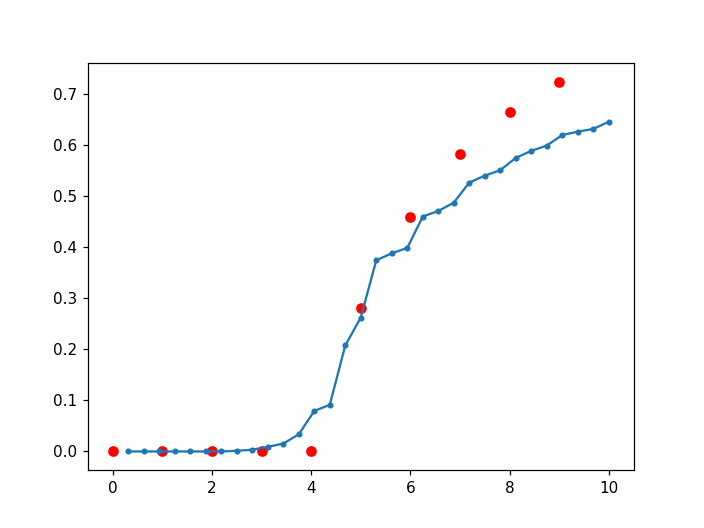

In [149]:
cur = np.apply_along_axis(lambda x: np.mean(x[-TAIL:]), 2, mem)
cur = np.apply_along_axis(np.mean, 0, cur)
plt.plot(bs, cur, '.-')

<IPython.core.display.Javascript object>


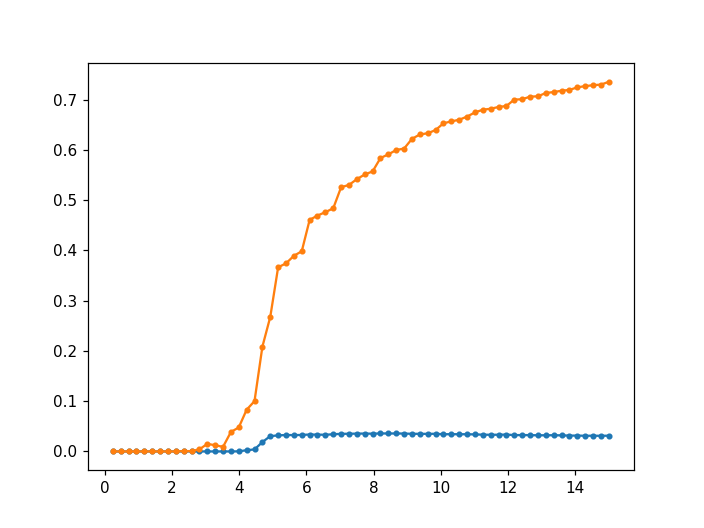

In [48]:
cur = np.apply_along_axis(lambda x: np.std(x[-TAIL:]), 2, mem)
cur = np.apply_along_axis(np.mean, 0, cur)
plt.plot(bs[:64], cur[:64], '.-')

In [126]:
for i in range(10):
    print(max(graphs[i].degrees().keys()))

98
134
110
94
106
110
102
108
121
105


In [150]:
s = [0] * 200
for graph in graphs:
    for d, cnt in graph.degrees().items():
        s[d] += cnt
s = np.array(s)
s = s / sum(s)
for i in range(1, len(s)):
    s[i] += s[i - 1]
k = 10
plt.scatter(np.arange(k), s[:k], c='red')